# Food Plots
Based on data from here: https://ourworldindata.org/grapher/food-emissions-supply-chain

In [1]:
import pandas as pd
from plotly_presentation import Plotter

In [2]:
data = pd.read_csv("_data/food-emissions-supply-chain.csv")
data.drop(columns=["Code", "Year"], inplace=True)
data["total"] = data.sum(axis=1, numeric_only=True)
data.head()

,Entity,food_emissions_land_use,food_emissions_farm,food_emissions_animal_feed,food_emissions_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses,total
0,Apples,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808,0.428401
1,Bananas,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185,0.861896
2,Barley,0.008676,0.176377,0.000000,0.127703,0.035351,0.263587,0.496786,0.070692,1.179171
3,Beef (beef herd),23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998,99.477405
4,Beef (dairy herd),1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515,33.301395


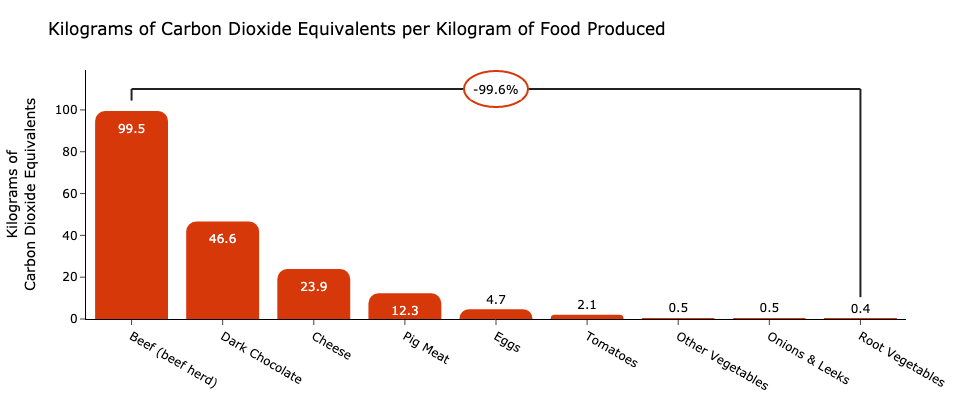

In [3]:
_selected_entities = [
    "Beef (beef herd)",
    "Dark Chocolate",
    "Cheese",
    "Tomatoes",
    "Onions & Leeks",
    "Eggs",
    "Root Vegetables",
    "Pig Meat",
    "Other Vegetables",
]
df = data[data["Entity"].isin(_selected_entities)][["Entity", "total"]].sort_values(
    by=["total"], ascending=[False]
)

# Plotting
p = Plotter(slide_layout="slide_wide")
p.express(
    type="bar",
    data_frame=df,
    x="Entity",
    y="total",
    text="total",
    text_auto=".1f",
    labels={"total": "Kilograms of<br>Carbon Dioxide Equivalents"},
    title="Kilograms of Carbon Dioxide Equivalents per Kilogram of Food Produced",
)
p.figure.update_layout(
    xaxis=dict(title=None),
)
y0 = df[df["Entity"] == "Beef (beef herd)"][["total"]].values[0][0]
y1 = df[df["Entity"] == "Root Vegetables"][["total"]].values[0][0]
text = f"{round((abs(y1)- abs(y0))*100 / abs(y0), 1)}%"
p.callout.add_square_growth_line(
    x0="Beef (beef herd)",
    x1="Root Vegetables",
    y0=y0 + 5,
    y1=y1 + 10,
    y_top=110,
    text=text,
)
p.show()